WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


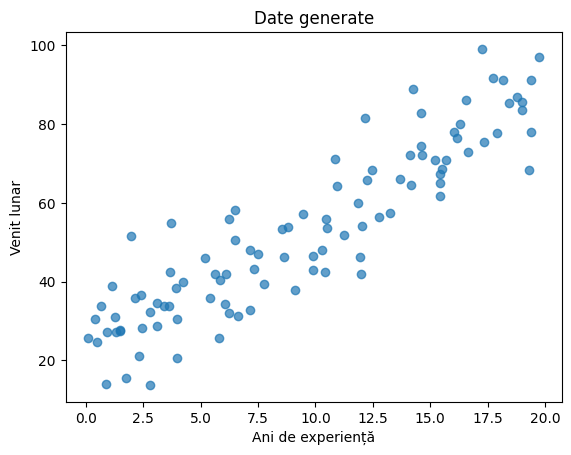

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 89 seconds.


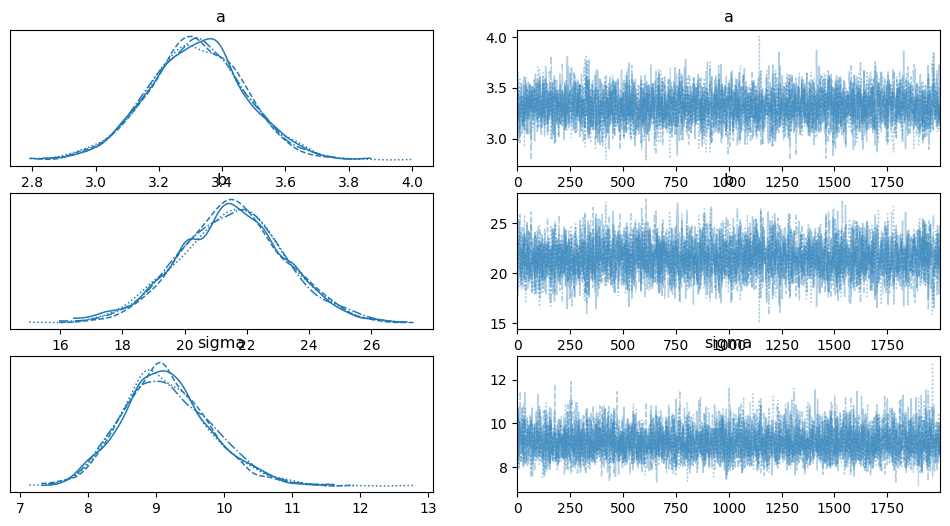

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
a       3.317  0.153     3.019      3.622      0.002    0.002    3816.0   
b      21.521  1.702    18.214     24.926      0.028    0.020    3673.0   
sigma   9.155  0.655     7.894     10.432      0.010    0.007    4670.0   

       ess_tail  r_hat  
a        3799.0    1.0  
b        3612.0    1.0  
sigma    4710.0    1.0  


In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# seen rendom pentru a putea reproduce experimentul
np.random.seed(42) 

# avem 100 de date
n_observatii = 100
x = np.random.uniform(0, 20, n_observatii)  # numarul anilor de experienta
a_adev = 3.5  # panta -> ritmul de crestere a veniturilor y in functie de anii de experienta a
b_adev = 20   # valoarea de baza a venitului
zgomot = np.random.normal(0, 10, n_observatii)  # generarea zgomotului
y = a_adev * x + b_adev + zgomot  # venitul lunar

# vizualizare
plt.scatter(x, y, alpha=0.7) # alpha -> opacitatea punctelor de pe grafic 70%
plt.xlabel("Ani de experienta")
plt.ylabel("Venit lunar")
plt.title("Date generate")
plt.show()

# b) estimarea parametrilor
with pm.Model() as model:
    # Priors pentru parametrii a si b
    a = pm.Normal("a", mu=0, sigma=10) # mu = 0 -> nu avem cunostinte anterioare despre model
    b = pm.Normal("b", mu=0, sigma=10) # sigma = 10 -> incertitudine mare
    
    # zgomot
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # modelul liniar
    y_est = a * x + b
    
    # datele observate
    y_obs = pm.Normal("y_obs", mu=y_est, sigma=sigma, observed=y)
    
    # sampling
    trace = pm.sample(2000, return_inferencedata=True, progressbar=True)

# afisare
import arviz as az
az.plot_trace(trace)
plt.show()

# comparere valori
posterior_mean = az.summary(trace, hdi_prob=0.95)
print(posterior_mean)
